In [2]:
# pip install -i https://pypi.tuna.tsinghua.edu.cn/simple pygal_maps_world

In [3]:
import pandas as pd
import numpy as np

import requests
import re

import matplotlib.pyplot as plt
import pandas as pd

import random
from statistics import quantiles
import matplotlib.pyplot as plt

In observative analysis on earthquake distribution, we normally plot the likelihood of historical occurrance in porobability density distribution (PDF). However, the drawback is the lack of predictabiliy if we hope to foresee the upcoming likelihood. In this notebook, I try to answer this question with help from the classic time series model in locations with higher occurances and simultated points in the less sensitive regions.

In [4]:
eq_df = pd.read_excel(r"C:\Users\yidan\Desktop\Projects\eqList2022_10_29.xlsx")
eq_df = eq_df.rename(columns = {"发震时刻": "Timestep", "震级(M)":"Magnitude", "纬度(°)":"Longitude", "经度(°)": "Latitude", "深度(千米)":"Depth", "参考位置":"RefLocation"})
eq_df.head(5)

,Timestep,Magnitude,Longitude,Latitude,Depth,RefLocation
0,2022-10-29 09:12:41,3.1,41.10,83.77,10.0,新疆阿克苏地区库车市
1,2022-10-29 08:09:48,5.5,-14.45,-76.35,10.0,秘鲁沿岸近海
2,2022-10-29 04:22:06,5.6,-14.55,-76.35,10.0,秘鲁沿岸近海
3,2022-10-28 23:30:43,4.4,24.64,121.96,60.0,台湾宜兰县海域
4,2022-10-28 04:34:52,3.0,41.78,79.70,12.0,新疆阿克苏地区温宿县


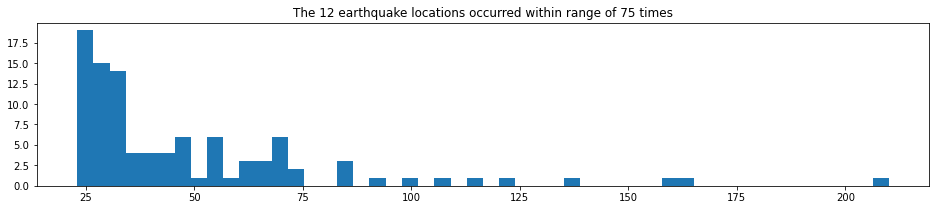

In [5]:
eq_cnt = eq_df.groupby('RefLocation')['Timestep'].count().reset_index().rename(columns = {'Timestep': 'Time_cnt'})
df_mag_n = eq_cnt.sort_values('Time_cnt', ascending = False)[:100]
plt.figure(figsize=(16, 3))
plt.hist(df_mag_n['Time_cnt'], bins = 50)
top_pct = df_mag_n[df_mag_n['Time_cnt'] >= 75]['RefLocation'].nunique()
plt.title("The {0} earthquake locations occurred within range of {1} times".format(top_pct, 75))
plt.show()

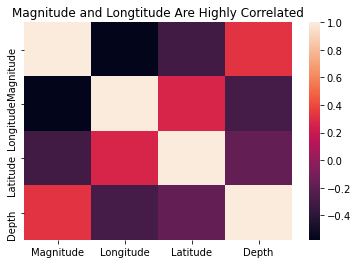

In [9]:
import seaborn as sb
plt.title("Magnitude and Longtitude Are Highly Correlated")
sb.heatmap(eq_df.corr())
plt.show()

In [196]:
df_mag_12 = df_mag_n[df_mag_n['Time_cnt'] >= 75]['RefLocation']
df_mag_12

693               塔吉克斯坦
993         新疆克孜勒苏州阿克陶县
448              吉尔吉斯斯坦
1117    新疆维吾尔自治区和田地区皮山县
1012          新疆和田地区皮山县
440             台湾花莲县海域
1108    新疆维吾尔自治区和田地区于田县
495             四川宜宾市珙县
995         新疆克孜勒苏州阿图什市
441           台湾花莲县附近海域
773                 尼泊尔
1448             瓦努阿图群岛
Name: RefLocation, dtype: object

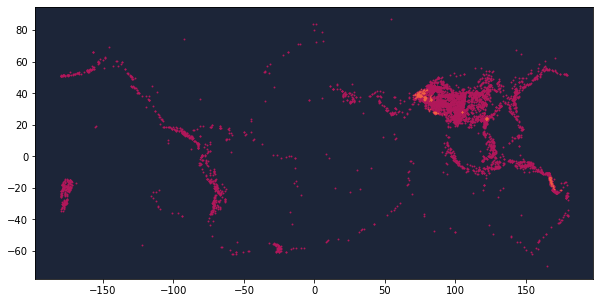

In [207]:
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x = eq_df["Latitude"], y = eq_df["Longitude"], s = 0.8, c = '#B0175A') 
df_freq_75 = df_mag_n[df_mag_n['Time_cnt']>= 75]
df_mag_ns = pd.merge(df_mag_12, eq_df, on='RefLocation', how='left')
ax.scatter(x = df_mag_ns["Latitude"], y = df_mag_ns["Longitude"], s = 0.05, c = '#F06143') 
ax.set_facecolor('#1C2538')

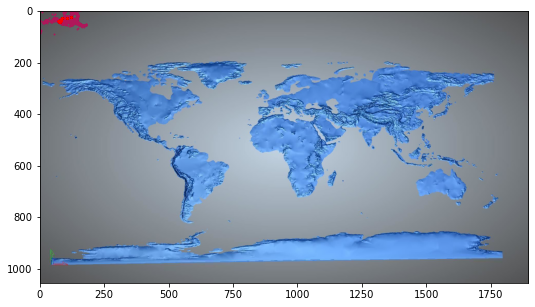

In [208]:
# from PIL import Image
from matplotlib import image
fig, ax = plt.subplots(figsize=(10,5))
img = image.imread(r"C:\Users\yidan\Desktop\Projects\world-map-3d-model-stl.jpg")
ax.scatter(x = eq_df["Latitude"], y = eq_df["Longitude"], s = 0.8, c = '#B0175A') 
ax.scatter(x = df_mag_ns["Latitude"], y = df_mag_ns["Longitude"], s = 0.5, c = 'red') 
plt.imshow(img)
plt.show()

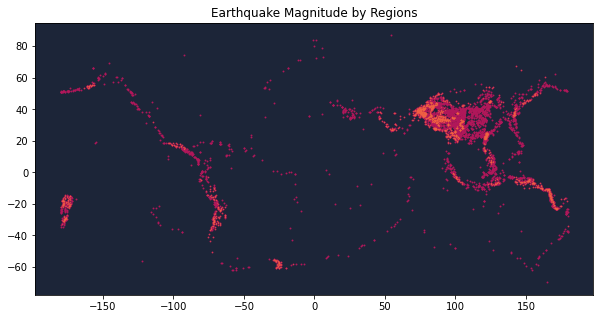

In [161]:
def freq_plot(top_n):
    eq_cnt = eq_df.groupby('RefLocation')['Timestep'].count().reset_index().rename(columns = {'Timestep': 'Time_cnt'})
    df_mag_n = eq_cnt.sort_values('Time_cnt', ascending = False)[:top_n]
    df_mag_ns = pd.merge(df_mag_n, eq_df, on='RefLocation', how='left')
    fig, ax = plt.subplots(figsize=(10,5))

    # all areas
    ax.scatter(x = eq_df["Latitude"], y = eq_df["Longitude"], s = 0.8, c = '#B0175A') 

    # top 100
    ax.scatter(x = df_mag_ns["Latitude"], y = df_mag_ns["Longitude"], s = 0.05, c = '#F06143') 

    # # top 50
    # ax.scatter(x = df_top_50["Latitude"], y = df_top_50["Longitude"], s = 0.05, c = '#F7C5A8') 

    ax.set_facecolor('#1C2538')
    plt.title("Earthquake Magnitude by Regions")
    plt.show()
    
freq_plot(100)

In [110]:
def magnitude_plot():
# top 50 magnitude area
    df_top_50 = top_mag(eq_df, 'Magnitude', 50)
    df_top_100 = top_mag(eq_df, 'Magnitude', 100)

    fig, ax = plt.subplots(figsize=(10,5))
    # all areas
    ax.scatter(x = eq_df["Latitude"], y = eq_df["Longitude"], s = 0.8, c = '#B0175A') 

    # top 100
    ax.scatter(x = df_top_100["Latitude"], y = df_top_100["Longitude"], s = 0.05, c = '#F06143') 

    # top 50
    ax.scatter(x = df_top_50["Latitude"], y = df_top_50["Longitude"], s = 0.05, c = '#F7C5A8') 

    ax.set_facecolor('#1C2538')
    plt.title("Earthquake Magnitude by Regions")
    plt.show()

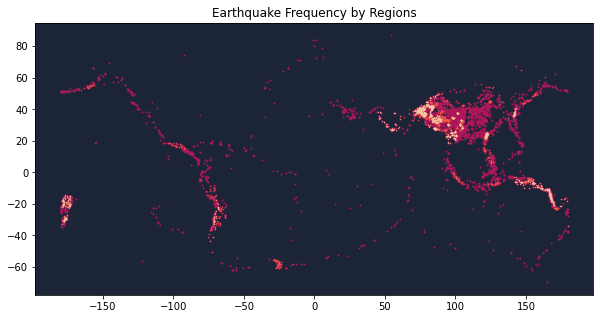

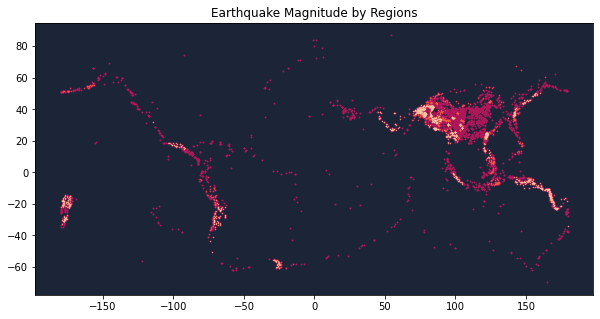

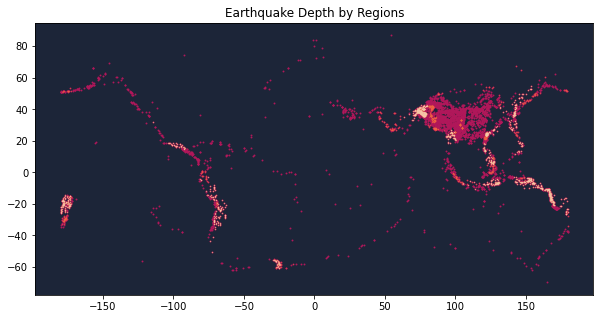

In [119]:
freq_plot()
magnitude_plot()
depth_plot()

In [ ]:
# Heat map 按percentile、model score分;
# Stats公式做eda分析

In [113]:
# Next Step
# Casualty